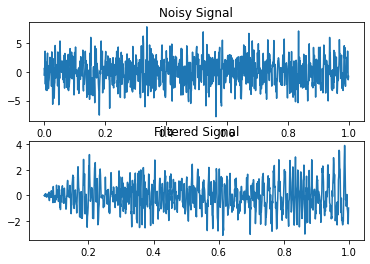

In [1]:
import numpy as np

def adaptive_filtering(d, L, mu, lambda_val):
    """
    Applies an adaptive filter to the input signal 'd' to remove noise.
    
    Parameters:
        d (numpy array): Noisy input signal.
        L (int): Filter length.
        mu (float): Step size for LMS update.
        lambda_val (float): Forgetting factor.
    
    Returns:
        y (numpy array): Filtered signal.
    """
    N = len(d)
    w = np.zeros(L)
    u = np.zeros(L)
    y = np.zeros(N)
    
    for n in range(L, N):
        # form input vector
        for i in range(L):
            u[i] = d[n-i-1]
        
        # compute output of filter
        y_n = np.dot(w, u)
        
        # compute error signal
        e_n = d[n] - y_n
        
        # update filter coefficients
        for i in range(L):
            w[i] = w[i] + 2 * mu * e_n * u[i] / (lambda_val + np.dot(u, u))
        
        # output filtered signal
        y[n] = y_n
    
    return y[L:]

# example usage
if __name__ == '__main__':
    # generate noisy signal with power line interference
    Fs = 1000  # sampling frequency
    t = np.arange(0, 1, 1/Fs)  # time vector
    d = np.sin(2*np.pi*60*t) + np.sin(2*np.pi*120*t) + 2*np.random.randn(len(t))
    
    # apply adaptive filtering to remove noise
    L = 64  # filter length
    mu = 0.1  # step size for LMS update
    lambda_val = 0.99  # forgetting factor
    y = adaptive_filtering(d, L, mu, lambda_val)
    
    # plot results
    import matplotlib.pyplot as plt
    fig, axs = plt.subplots(2, 1)
    axs[0].plot(t, d)
    axs[0].set_title('Noisy Signal')
    axs[1].plot(t[L:], y)
    axs[1].set_title('Filtered Signal')
    plt.show()

# Here's what each line does:

# Lines 1-8 define a function adaptive_filtering that applies the adaptive filter to the input signal d. The function takes as input the signal d, the filter length L, the step size mu for the LMS update, and the forgetting factor lambda_val. The function returns the filtered signal y.

# Lines 10-16 initialize some variables for the adaptive filtering algorithm: the length of the input signal N, the filter coefficients w (initialized to zeros), the input vector u (initialized to zeros), and the output vector y (initialized to zeros).

# Lines 18-27 perform the adaptive filtering using the LMS algorithm. At each iteration, an input vector is formed by taking the L previous noisy input signal samples. The output of the filter is computed by taking the dot product of the filter coefficients and the input vector. The error signal is then computed as the difference between the current noisy input signal sample and the output of the filter. Finally, the filter coefficients are updated using the LMS update formula.

# Line 29 returns the filtered signal y.

# Lines 32-46 generate a noisy input signal d with power line interference and apply the adaptive filter to remove the noise.